In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp

In [2]:
from dishpylib.pyhelpers import make_outattr_metadata
from dishpylib.pyhelpers import print_runtime

In [3]:
print_runtime()

context: ci
hostname: 11104958246a
interpreter: 3.8.10 (default, May  5 2021, 03:01:07)  [GCC 7.5.0]
notebook name: None
notebook path: None
revision: 13111f18
timestamp: 2021-06-06T01:12:46Z00:00

IPython==7.16.1
boto3==1.14.44
botocore==1.17.44
iterdub==0.2.0
matplotlib==3.3.2
pandas==1.1.2
scipy==1.5.4
seaborn==0.11.0
teeplot==0.1.1


# get data

In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)

In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2270,2277,2284,2285,2286,2287,2289,2290,2291,2292,2298,2299,2300,2301,2302,2308,2309,2310,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159,3160,3161,3162,3163,3164,3165,3166

'5d28d227ae1c65e9'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

In [7]:
dfm10 = df[ df['Stint'] % 10 == 0 ]

# how do fitness complexity and phenotypic complexity relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=phenotype-complexity+y=fitness-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=phenotype-complexity+y=fitness-complexity+ext=.png


<AxesSubplot:xlabel='Phenotype Complexity', ylabel='Fitness Complexity'>

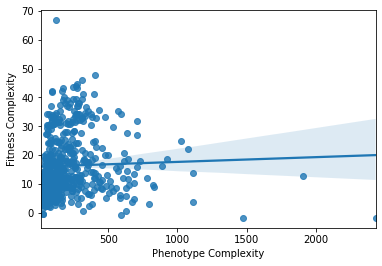

In [8]:
tp.tee(
    sns.regplot,
    data=df,
    x='Phenotype Complexity',
    y='Fitness Complexity',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fitness-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fitness-complexity+ext=.png


(0.3737262697566279, 0.01752546549427534)

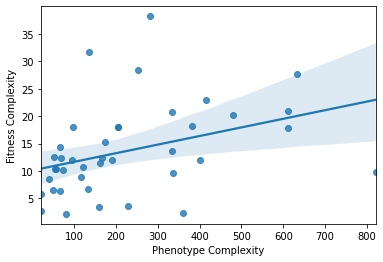

In [9]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Phenotype Complexity',
    y='Fitness Complexity',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Phenotype Complexity',
        'Fitness Complexity',
    ],
)
stats.pearsonr(
    fil['Phenotype Complexity'],
    fil['Fitness Complexity'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fitness-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fitness-complexity+ext=.png


(-0.10624728477449845, 0.5140724473031709)

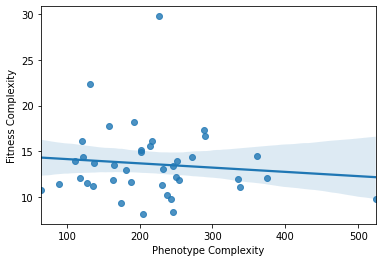

In [10]:
tp.tee(
    sns.regplot,
    data=df.groupby('Series').mean(),
    x='Phenotype Complexity',
    y='Fitness Complexity',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

stats.pearsonr(
    df.groupby('Series')['Phenotype Complexity'].mean(),
    df.groupby('Series')['Fitness Complexity'].mean(),
)